In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('data_byond.csv')
scaler = MinMaxScaler()
data[['score']] = scaler.fit_transform(data[['score']])
print(data.head())

                    userName  score                   at  \
0             Lamtiar Sinaga   1.00  12/21/2024 11:36:00   
1  Bacharuddin Yusuf Sabilla   0.00  12/21/2024 11:29:00   
2              Darma santosa   0.00  12/21/2024 11:27:00   
3             Hanif Alfarisy   0.00  12/21/2024 11:26:00   
4                 Ratna Mana   0.25  12/21/2024 11:15:00   

                                             content  
0  aplikasinya bagus banget apalagi tampilan baru...  
1  Sama aja sama bsi mobile, gak bisa disambi, ke...  
2  Saat verifikasi wajah selalu gagal dengan noti...  
3  Kirim bukti tf gabisa, screenshot gabisa, telp...  
4  Kenapa mau login beyond ad tulisan closing bla...  


In [21]:
import nltk
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from nltk.stem import PorterStemmer


# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Initialize the stemmer
stemmer = PorterStemmer()

# Define the stemming function
def stem_text(text):
    tokens = nltk.word_tokenize(text) # Break text into words
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens) # Join stemmed words back into a string

# Print the column names to verify the correct name
print(data.columns)

# Apply stemming to the correct column
# Assuming the column is named 'text' instead of 'text_column'
data['stemmed_text'] = data['content'].apply(stem_text)

# You can now work with the 'stemmed_text' column in your DataFrame

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Index(['userName', 'score', 'at', 'content'], dtype='object')


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['stemmed_text'])

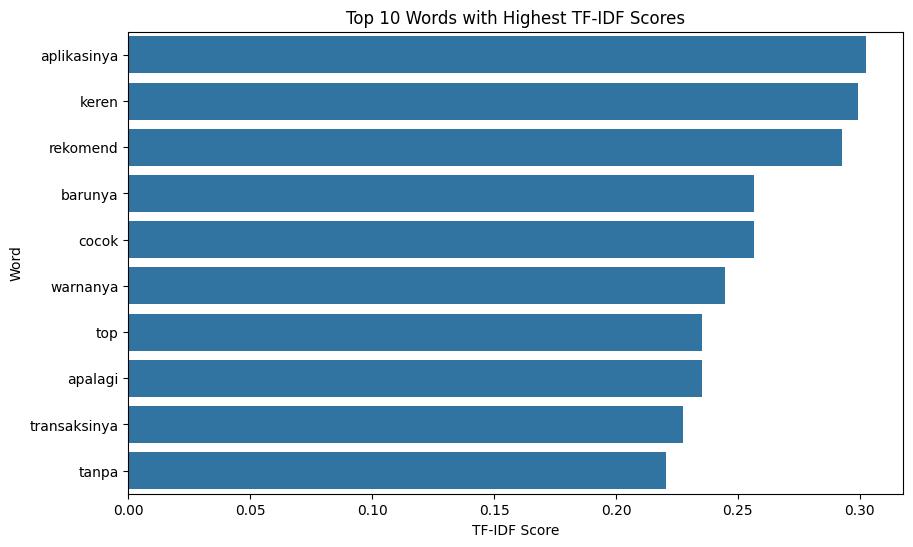

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize top 10 words with highest TF-IDF scores in a document
feature_names = vectorizer.get_feature_names_out()
top_words = pd.DataFrame(tfidf_matrix[0].T.todense(), index=feature_names, columns=["tfidf"])
top_words = top_words.sort_values(by=["tfidf"],ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="tfidf", y=top_words.index, data=top_words)
plt.title("Top 10 Words with Highest TF-IDF Scores")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()